# 반갑습니다 13기 여러분

과제를 진행해 볼게요

혹시라도 도저히 모르겠거나 해결이 안되신다면 01040493041로 전화주시거나 카톡주세요!!

# ''' ? ''' 이 있는 부분을 채워주시면 됩니다

나는 내 스타일로 하겠다 하시면 그냥 구현 하셔도 됩니다!!

참고하셔야 하는 함수들은 링크 달아드렸으니 들어가서 확인해보세요

# 1) PCA의 과정을 한번 차근차근 밟아 볼거에요 잘 따라 오세요

### PCA 란?
- 고유값 분해 한 값중에 고유값이 제일크고, 그것에 해당하는 고유벡터 축을 뽑아내는것.

In [1]:
import numpy as np
import numpy.linalg as lin
import matplotlib.pyplot as plt
import pandas as pd
import random

#   기본 모듈들을 불러와 줍니다

In [2]:
x1 = [95, 91, 66, 94, 68, 63, 12, 73, 93, 51, 13, 70, 63, 63, 97, 56, 67, 96, 75, 6]
x2 = [56, 27, 25, 1, 9, 80, 92, 69, 6, 25, 83, 82, 54, 97, 66, 93, 76, 59, 94, 9]
x3 = [57, 34, 9, 79, 4, 77, 100, 42, 6, 96, 61, 66, 9, 25, 84, 46, 16, 63, 53, 30]

#   설명변수 x1, x2, x3의 값이 이렇게 있네요

In [3]:
X = np.stack((x1,x2,x3),axis=0)

#   설명변수들을 하나의 행렬로 만들어 줍니다

In [4]:
X = pd.DataFrame(X.T,columns=['x1','x2','x3'])

In [5]:
X

,x1,x2,x3
0,95,56,57
1,91,27,34
2,66,25,9
3,94,1,79
4,68,9,4
5,63,80,77
6,12,92,100
7,73,69,42
8,93,6,6
9,51,25,96


1-1) 먼저 PCA를 시작하기 전에 항상!!!!!! 데이터를 scaling 해주어야 해요

https://datascienceschool.net/view-notebook/f43be7d6515b48c0beb909826993c856/ 를 참고하시면 도움이 될거에요

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_std = scaler.fit_transform(X)  # fit 메서드로 데이터 변환을 학습하고, transform 메서드로 실제 데이터의 스케일을 조정합니다. 

In [7]:
X_std

array([[ 1.08573604,  0.02614175,  0.30684189],
       [ 0.93801686, -0.86575334, -0.46445467],
       [ 0.01477192, -0.92726334, -1.30282049],
       [ 1.04880625, -1.66538341,  1.04460382],
       [ 0.08863151, -1.41934339, -1.47049366],
       [-0.09601747,  0.76426183,  0.97753455],
       [-1.97943714,  1.13332186,  1.74883111],
       [ 0.2732805 ,  0.42595679, -0.1961776 ],
       [ 1.01187645, -1.5116084 , -1.40342439],
       [-0.53917504, -0.92726334,  1.61469258],
       [-1.94250735,  0.85652683,  0.44098042],
       [ 0.16249111,  0.82577183,  0.60865359],
       [-0.09601747, -0.03536825, -1.30282049],
       [-0.09601747,  1.28709688, -0.76626636],
       [ 1.15959564,  0.33369178,  1.21227698],
       [-0.35452606,  1.16407687, -0.06203907],
       [ 0.05170172,  0.64124181, -1.06807806],
       [ 1.12266584,  0.11840676,  0.50804969],
       [ 0.3471401 ,  1.19483187,  0.17270336],
       [-2.20101593, -1.41934339, -0.5985932 ]])

In [8]:
features = X_std.T   # 전치행렬

In [9]:
features

array([[ 1.08573604,  0.93801686,  0.01477192,  1.04880625,  0.08863151,
        -0.09601747, -1.97943714,  0.2732805 ,  1.01187645, -0.53917504,
        -1.94250735,  0.16249111, -0.09601747, -0.09601747,  1.15959564,
        -0.35452606,  0.05170172,  1.12266584,  0.3471401 , -2.20101593],
       [ 0.02614175, -0.86575334, -0.92726334, -1.66538341, -1.41934339,
         0.76426183,  1.13332186,  0.42595679, -1.5116084 , -0.92726334,
         0.85652683,  0.82577183, -0.03536825,  1.28709688,  0.33369178,
         1.16407687,  0.64124181,  0.11840676,  1.19483187, -1.41934339],
       [ 0.30684189, -0.46445467, -1.30282049,  1.04460382, -1.47049366,
         0.97753455,  1.74883111, -0.1961776 , -1.40342439,  1.61469258,
         0.44098042,  0.60865359, -1.30282049, -0.76626636,  1.21227698,
        -0.06203907, -1.06807806,  0.50804969,  0.17270336, -0.5985932 ]])

1-2) 자 그럼 공분산 행렬을 구해볼게요\

https://docs.scipy.org/doc/numpy/reference/generated/numpy.cov.html 를 참고하시면 도움이 될거에요

In [10]:
cov_matrix = np.cov(features)

In [11]:
cov_matrix

array([[ 1.05263158, -0.2037104 , -0.12079228],
       [-0.2037104 ,  1.05263158,  0.3125801 ],
       [-0.12079228,  0.3125801 ,  1.05263158]])

1-3) 이제 고유값과 고유벡터를 구해볼게요

방법은 실습코드에 있어요!!

PCA 는 공분산 행렬을 분해하는 것이다.

정방행렬 A에 대해 다음 식을 만족하는 영벡터가 아닌 벡터 v,λ 를 찾을수 있다고 가정하자,
> Av=λv 
- 이때 위의 식을 만족하는 실수 λ를 고유값, v를 고유벡터 라고 한다. 

In [12]:
eigenvalues = lin.eig(cov_matrix)[0]   # 고유값 : 전체 분산에 대한 주성분의 설명비율
eigenvectors = lin.eig(cov_matrix)[1]   # 고유벡터 : 데이터가 분산된 방향

In [13]:
print(eigenvalues)
print(eigenvectors)

[1.48756162 0.94435407 0.72597904]
[[ 0.47018528 -0.85137353 -0.23257022]
 [-0.64960236 -0.15545725 -0.74421087]
 [-0.59744671 -0.50099516  0.62614797]]


In [14]:
mat = np.zeros((3,3))

In [15]:
mat

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [16]:
mat[0][0] = eigenvalues[0]
mat[1][1] = eigenvalues[1]
mat[2][2] = eigenvalues[2]

In [17]:
mat     # 고유값을 대각 원소로 하는 대각행렬 

array([[1.48756162, 0.        , 0.        ],
       [0.        , 0.94435407, 0.        ],
       [0.        , 0.        , 0.72597904]])

1-4) 자 이제 고유값 분해를 할 모든 준비가 되었어요 고유값 분해의 곱으로 원래 공분산 행렬을 구해보세요

https://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html 를 참고해서 행렬 끼리 곱하시면 됩니다

행렬 곱으로 eigenvector x mat x eigenvector.T 하면 될거에요

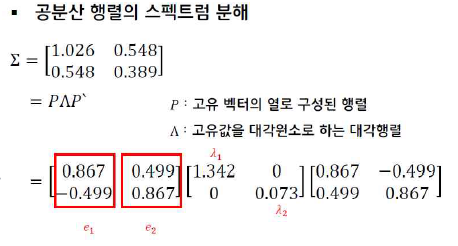

In [18]:
np.dot(np.dot(eigenvectors,mat),eigenvectors.T)

array([[ 1.05263158, -0.2037104 , -0.12079228],
       [-0.2037104 ,  1.05263158,  0.3125801 ],
       [-0.12079228,  0.3125801 ,  1.05263158]])

1-5) 마지막으로 고유 벡터 축으로 값을 변환해 볼게요

함수로 한번 정의해 보았어요

https://docs.scipy.org/doc/numpy/reference/generated/numpy.concatenate.html

 PCA는 변수가 p개, 관측치가 n개 있는 데이터 X(p x n)로 새로운 변수 z를 만드는 과정
 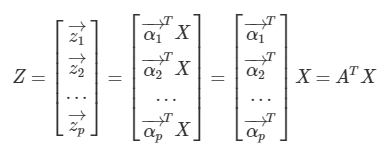

원데이터 X의 분산을 최대화하는 α= 공분산행렬 Σ의 고유벡터

- 공분산행렬 Σ의 서로 다른 고유벡터끼리는 서로 직교(orthogonal)함을 확인할 수 있습니다.
- 원데이터를 공분산 행렬의 고유벡터로 사영하기 전에는 변수 간 연관성이 있었더라도 **PCA 변환에 의하여 좌표축이 바뀐 데이터들은 서로 무상관(uncorrelated)**이게 됩니다.
- https://ratsgo.github.io/machine%20learning/2017/04/24/PCA/

In [19]:
def new_coordinates(X,eigenvectors):
    for i in range(eigenvectors.shape[0]):
        if i == 0:
            new = [X.dot(eigenvectors.T[i])]   
        else:
            new = np.concatenate((new,[X.dot(eigenvectors.T[i])]),axis=0)
    return new.T

# 모든 고유 벡터 축으로 데이터를 projection한 값입니다

In [20]:
new_coordinates(X_std,eigenvectors)

# 새로운 축으로 변환되어 나타난 데이터들입니다

array([[ 0.31019368, -1.08215716, -0.07983642],
       [ 1.28092404, -0.43132556,  0.13533091],
       [ 1.38766381,  0.78428014, -0.12911446],
       [ 0.95087515, -1.15737142,  1.6495519 ],
       [ 1.84222365,  0.88189889,  0.11493111],
       [-1.12563709, -0.52680338,  0.06564012],
       [-2.71174416,  0.63290138,  0.71195473],
       [-0.03100441, -0.20059783, -0.50339479],
       [ 2.29618509,  0.07661447,  0.01087174],
       [-0.61585248, -0.205764  ,  1.82651199],
       [-1.73320252,  1.29971699,  0.09045178],
       [-0.82366049, -0.57164535, -0.27123176],
       [ 0.75619512,  0.73995175, -0.76710616],
       [-0.42344386,  0.26555394, -1.41533681],
       [-0.39581307, -1.64646874,  0.24104031],
       [-0.88581498,  0.15195119, -0.82271209],
       [ 0.24587691,  0.39139878, -1.15801831],
       [ 0.14741103, -1.22874561, -0.03110396],
       [-0.7161265 , -0.56781471, -0.86180345],
       [ 0.24475107,  2.39442622,  1.19337361]])

# 2) PCA를 구현해 보세요

위의 과정을 이해하셨다면 충분히 하실 수 있을거에요

In [21]:
from sklearn.preprocessing import StandardScaler

def MYPCA(X,number):
    scaler = StandardScaler()
    x_std = scaler.fit_transform(X)
    features = x_std.T
    cov_matrix = np.cov(features)
    
    eigenvalues = lin.eig(cov_matrix)[0]
    eigenvectors = lin.eig(cov_matrix)[1]
    
    new_coordinates(x_std,eigenvectors)
    
    new_coordinate = new_coordinates(x_std,eigenvectors)
    
    index = eigenvalues.argsort()
    index = list(index)
    
    for i in range(number):
        if i==0:
            new = [new_coordinate[:,index.index(i)]]
        else:
            new = np.concatenate(([new_coordinate[:,index.index(i)]],new),axis=0)
    return new.T

In [22]:
MYPCA(X,3)

# 새로운 축으로 잘 변환되어서 나타나나요?
# 위에서 했던 PCA랑은 차이가 있을 수 있어요 왜냐하면 위에서는 고유값이 큰 축 순서로 정렬을 안했었거든요

array([[ 0.31019368, -1.08215716, -0.07983642],
       [ 1.28092404, -0.43132556,  0.13533091],
       [ 1.38766381,  0.78428014, -0.12911446],
       [ 0.95087515, -1.15737142,  1.6495519 ],
       [ 1.84222365,  0.88189889,  0.11493111],
       [-1.12563709, -0.52680338,  0.06564012],
       [-2.71174416,  0.63290138,  0.71195473],
       [-0.03100441, -0.20059783, -0.50339479],
       [ 2.29618509,  0.07661447,  0.01087174],
       [-0.61585248, -0.205764  ,  1.82651199],
       [-1.73320252,  1.29971699,  0.09045178],
       [-0.82366049, -0.57164535, -0.27123176],
       [ 0.75619512,  0.73995175, -0.76710616],
       [-0.42344386,  0.26555394, -1.41533681],
       [-0.39581307, -1.64646874,  0.24104031],
       [-0.88581498,  0.15195119, -0.82271209],
       [ 0.24587691,  0.39139878, -1.15801831],
       [ 0.14741103, -1.22874561, -0.03110396],
       [-0.7161265 , -0.56781471, -0.86180345],
       [ 0.24475107,  2.39442622,  1.19337361]])

# 3) sklearn이랑 비교를 해볼까요?

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html 를 참고하시면 도움이 될거에요

In [23]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)

In [24]:
pca_features=pca.fit_transform(X_std)
print(pca_features)

[[-0.31019368 -1.08215716 -0.07983642]
 [-1.28092404 -0.43132556  0.13533091]
 [-1.38766381  0.78428014 -0.12911446]
 [-0.95087515 -1.15737142  1.6495519 ]
 [-1.84222365  0.88189889  0.11493111]
 [ 1.12563709 -0.52680338  0.06564012]
 [ 2.71174416  0.63290138  0.71195473]
 [ 0.03100441 -0.20059783 -0.50339479]
 [-2.29618509  0.07661447  0.01087174]
 [ 0.61585248 -0.205764    1.82651199]
 [ 1.73320252  1.29971699  0.09045178]
 [ 0.82366049 -0.57164535 -0.27123176]
 [-0.75619512  0.73995175 -0.76710616]
 [ 0.42344386  0.26555394 -1.41533681]
 [ 0.39581307 -1.64646874  0.24104031]
 [ 0.88581498  0.15195119 -0.82271209]
 [-0.24587691  0.39139878 -1.15801831]
 [-0.14741103 -1.22874561 -0.03110396]
 [ 0.7161265  -0.56781471 -0.86180345]
 [-0.24475107  2.39442622  1.19337361]]


In [25]:
MYPCA(X,3)

array([[ 0.31019368, -1.08215716, -0.07983642],
       [ 1.28092404, -0.43132556,  0.13533091],
       [ 1.38766381,  0.78428014, -0.12911446],
       [ 0.95087515, -1.15737142,  1.6495519 ],
       [ 1.84222365,  0.88189889,  0.11493111],
       [-1.12563709, -0.52680338,  0.06564012],
       [-2.71174416,  0.63290138,  0.71195473],
       [-0.03100441, -0.20059783, -0.50339479],
       [ 2.29618509,  0.07661447,  0.01087174],
       [-0.61585248, -0.205764  ,  1.82651199],
       [-1.73320252,  1.29971699,  0.09045178],
       [-0.82366049, -0.57164535, -0.27123176],
       [ 0.75619512,  0.73995175, -0.76710616],
       [-0.42344386,  0.26555394, -1.41533681],
       [-0.39581307, -1.64646874,  0.24104031],
       [-0.88581498,  0.15195119, -0.82271209],
       [ 0.24587691,  0.39139878, -1.15801831],
       [ 0.14741103, -1.22874561, -0.03110396],
       [-0.7161265 , -0.56781471, -0.86180345],
       [ 0.24475107,  2.39442622,  1.19337361]])

# 4) MNIST data에 적용을 해볼게요!

mnist data를 따로 내려받지 않게 압축파일에 같이 두었어요~!!!

mnist-original.mat 파일과 같은 위치에서 주피터 노트북을 열어주세요~!!!

In [26]:
import numpy as np
import numpy.linalg as lin
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_mldata
from scipy import io
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

# mnist 손글씨 데이터를 불러옵니다

In [27]:
mnist = io.loadmat('mnist-original.mat') 
X = mnist['data'].T
y = mnist['label'].T

In [28]:
# data information

# 7만개의 작은 숫자 이미지
# 행 열이 반대로 되어있음 -> 전치
# grayscale 28x28 pixel = 784 feature
# 각 picel은 0~255의 값
# label = 1~10 label이 총 10개인거에 주목하자

In [29]:
# data를 각 픽셀에 이름붙여 표현
feat_cols = [ 'pixel'+str(i) for i in range(X.shape[1]) ]
df = pd.DataFrame(X,columns=feat_cols)
df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
# df에 라벨 y를 붙여서 데이터프레임 생성
df['y'] = y

In [31]:
df

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,y
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0


# 지금까지 배운 여러 머신러닝 기법들이 있을거에요

4-1) train_test_split을 통해 데이터를 0.8 0.2의 비율로 분할 해 주시고요

4-2) PCA를 이용하여 mnist data를 축소해서 학습을 해주세요 / test error가 제일 작으신 분께 상품을 드리겠습니다 ^0^

특정한 틀 없이 자유롭게 하시면 됩니다!!!!!!!!!

In [32]:
df.shape[0]   # 7만개의 숫자 데이터로 이루어져있다.

70000

### 데이터가 어떤식으로 저장되어있는지 시각화 해보았습니다.

<Figure size 432x288 with 0 Axes>

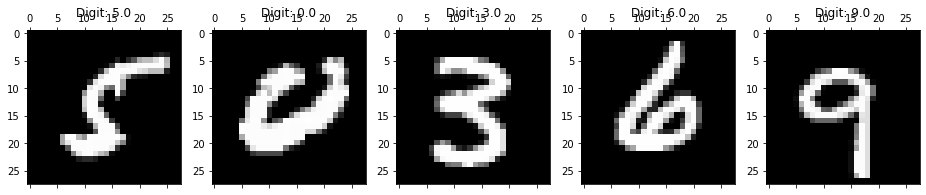

In [33]:
rndperm = np.random.permutation(df.shape[0])  #전체 70,000개의 데이터를 무작위로 순서를 섞은 후

# 임의로 5개의 데이터를 시각화 해보겠습니다.
plt.gray()

fig = plt.figure( figsize=(16,7) )
for i in range(0,5):
    ax  = fig.add_subplot(1,5,i+1,title='Digit: ' + str(df.loc[rndperm[i], 'y']) )
    ax.matshow(df.loc[rndperm[i], feat_cols].values.reshape((28,28)).astype(float))

plt.show()

### PCA를 하기위해서
1) 데이터를 split 한다.

2) X_train , X_test data를 scaling해준다.
> 이때 1번과 2번의 순서가 바뀌게 되면 scaling 하는과정에 test 정보가 들어가므로 순서 주의

3) 축소할 차원의 수를 찾는다. ( 고유값이 상대적으로 얼마나 잘 설명하는지 알기위해 분산의 설명합 누적을 사용 : 누적설명률이 70%~80% 이상인 지점을 찾아보자 .)

4) 그리고 PCA

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [35]:
# 데이터를 먼저 split 한담에, 
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state=42)

In [36]:
# 이 부분은 scale 과 pca 아무것도 없이 random forest 돌리면 어떤 결과가 나오는지 궁금해서
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_jobs=-1, n_estimators=10)
rfc.fit(X_train, y_train)

C:\Users\MiSung\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [37]:
rfc.score(X_test, y_test)

0.9476428571428571

In [38]:
# 정규화 : data scale 을 통해 변수마다 가중치를 균등하게 만들어 주어야한다.
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [39]:
# Choosing the Right Number of Dimensions
# 분산을 충분히 설명할수 있는 차원의 수를 결정해야함
pca = PCA() #주성분 개수 지정하지 않고 클래스생성
pca.fit_transform(X_train)  #주성분 분석

# 고유값이 상대적으로 얼마나 잘 설명하는지 알기위해
cumsum = np.cumsum(pca.explained_variance_ratio_) #분산의 설명량을 누적합
num_d = np.argmax(cumsum >= 0.7) +1 # 분산의 설명량이 70%이상 되는 차원의 수
num_c = np.argmax(cumsum >= 0.8) + 1 #분산의 설명량이 80%이상 되는 차원의 수

In [40]:
print(num_d)
print(num_c)

97
147


In [41]:
n=97

# pca , 디폴트 components는 n(전체 feature 수)
pca = PCA(n_components=n)

In [42]:
X_train.shape

(56000, 784)

In [43]:
y_train.shape

(56000, 1)

In [44]:
X_train_pca = pca.fit_transform(X_train)

In [45]:
# shape 가 바뀐것을 알수있다. 
X_train_pca.shape

(56000, 97)

In [46]:
# Explained Variance Ratio 각 주성분이 분산을 설명하는 비율을 확인할 수 있음
print('eigen_value :', pca.explained_variance_)
print('explained variance ratio :', pca.explained_variance_ratio_)

eigen_value : [40.63902529 29.07495131 26.90099853 20.71063848 18.13004518 15.69386837
 13.77256853 12.50122328 11.0357509  10.02284169  9.67120516  8.62117477
  8.02175968  7.8298903   7.39227538  7.147537    6.71243246  6.5868059
  6.40256259  6.18846671  5.92933365  5.70808682  5.48589295  5.33574558
  5.18361772  4.95491476  4.89422845  4.72860806  4.51106501  4.39605438
  4.29801309  4.27747865  4.10357064  4.06556622  4.02450544  3.97360664
  3.84186302  3.76785052  3.69728142  3.6750597   3.43363006  3.43119136
  3.34623903  3.27575403  3.24087488  3.16596935  3.15287816  3.11666933
  3.08243374  3.05490149  2.9327139   2.87961288  2.83775564  2.78686782
  2.74259921  2.69235737  2.67143616  2.57201561  2.55527     2.50883442
  2.4825129   2.45318139  2.44767328  2.41493021  2.38372904  2.37215368
  2.30887729  2.26888537  2.24893908  2.21366079  2.1800187   2.16441267
  2.1522562   2.12883304  2.11477134  2.0896363   2.06235515  2.05394483
  2.04628985  2.03045155  1.99734493  

In [47]:
rfc = RandomForestClassifier(n_jobs=-1, n_estimators=10)  # 0~9 까지의 분류니까 10
rfc.fit(X_train_pca, y_train)

C:\Users\MiSung\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

### x_test에 fit_transforms 하면 안된다. 
### 왜냐면 pca에서 한대로 transform을 적용해야하는거니까.!! 
- 처음에 이것때문에 계속 값이 0.5 가 나왔다..

In [48]:
# x_test에 fit_transforms 하면 안된다. 
# 왜냐면 pca에서 한대로 transform을 적용해야하는거니까.!! 
X_test_pca = pca.transform(X_test)
rfc.score(X_test_pca, y_test)

0.9107857142857143

### ★정리★
#### PCA를 한다는것이 종속변수 y를 맞추는것과 관련이 없다.
#### 그냥 내가 가지고 있는 데이터를 축들로 가장 잘 설명하자! 이것이 목표
#### 차원의 저주, 공선성문제를 해결하기 위해 사용하는것이다.

### LDA
- 같은 라벨이 있는 애들을 가지고 압축을 한다.

# tsne
- 비선형적인 모델을 잘 나타낸다.
- t-SNE는 원본 데이터를 가장 잘 표현할 수 있도록 데이터의 차원을 줄이는 방법입니다. - t-SNE 알고리즘은 많은 계산이 요구되기 때문에, 1차적으로 차원을 축소한 후에 t-SNE 알고리즘에 데이터를 입력해야 하는 경우도 있을 것입니다. 
- 또한, t-SNE 알고리즘은 N개의 데이터가 있을때 N^2 만큼 시간이 오래걸리기 때문에 실제 데이터를 분석하는데 있어서 제한적일 수 있습니다.

출처: https://skyeong.net/186 [금융 데이터를 분석하는 뇌과학자]

In [49]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [50]:
# MNIST 데이터는 데이터의 차원이 크지는 않지만 
#데이터가 70,000개 정도 있기 때문에 분석에 사용되는 데이터를 
#전체의 약 10% 정도인 7,000개로 줄여서 분석을 진행해 보겠습니다.
n_sne = 7000

In [54]:
X_train_small = df.loc[rndperm[:n_sne],feat_cols].values

In [55]:
y_train_small = df.loc[rndperm[:n_sne],'y'].values

In [56]:
# 2차원으로 차원 축소
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300) 
tsne_results = tsne.fit_transform(X_train_small)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 7000 samples in 0.645s...
[t-SNE] Computed neighbors for 7000 samples in 85.602s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7000
[t-SNE] Computed conditional probabilities for sample 2000 / 7000
[t-SNE] Computed conditional probabilities for sample 3000 / 7000
[t-SNE] Computed conditional probabilities for sample 4000 / 7000
[t-SNE] Computed conditional probabilities for sample 5000 / 7000
[t-SNE] Computed conditional probabilities for sample 6000 / 7000
[t-SNE] Computed conditional probabilities for sample 7000 / 7000
[t-SNE] Mean sigma: 469.380193
[t-SNE] KL divergence after 250 iterations with early exaggeration: 83.777924
[t-SNE] KL divergence after 300 iterations: 2.477881


In [57]:
tsne_results.shape

(7000, 2)

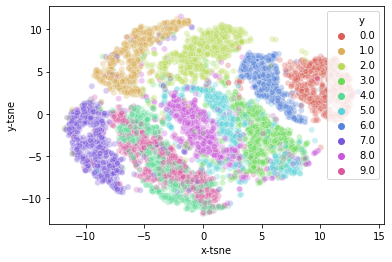

In [67]:
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
df_tsne = df.loc[rndperm[:n_sne],:].copy() 

df_tsne['x-tsne'] = tsne_results[:,0] 
df_tsne['y-tsne'] = tsne_results[:,1] 

sns.scatterplot(
    x="x-tsne", y="y-tsne",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df_tsne,
    legend="full",
    alpha=0.3,
)

각 숫자들을 아주 잘 구분해 주는 것을 알 수 있다.